In [42]:
import openeo
import openeo.extra.spectral_indices as opc 
import pandas as pd
import numpy as np
import openeo.processes as eop
from numpy import uint8
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import xarray as xr

In [43]:
connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [3]:
connection.list_collection_ids()

['SENTINEL3_OLCI_L1B',
 'SENTINEL3_SLSTR',
 'SENTINEL_5P_L2',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON1',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON2',
 'COPERNICUS_PLANT_PHENOLOGY_INDEX',
 'ESA_WORLDCOVER_10M_2020_V1',
 'ESA_WORLDCOVER_10M_2021_V2',
 'COPERNICUS_VEGETATION_INDICES',
 'SENTINEL2_L1C',
 'SENTINEL2_L2A',
 'SENTINEL1_GRD',
 'COPERNICUS_30',
 'LANDSAT8_L2',
 'SENTINEL3_SYN_L2_SYN',
 'SENTINEL3_SLSTR_L2_LST']

In [4]:
connection.describe_collection("SENTINEL2_L2A")

{'assets': {'thumbnail': {'href': 'https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/07/tallinn_estonia/24383281-1-eng-GB/Tallinn_Estonia_pillars.jpg',
   'roles': ['thumbnail'],
   'title': 'Sentinel 2 L2A',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B09',
    'B11',
    'B12',
    'WVP',
    'AOT',
    'SCL',
    'sunAzimuthAngles',
    'sunZenithAngles',
    'viewAzimuthMean',
    'viewZenithMean']},
  't': {'extent': ['2015-07-04T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': 'SENTINEL-2 is a wide-swath, high-resolution, multi-spectral imaging mission, supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas. The SENTINEL-2 Multispectral Instrument (MSI) samples 13 spectral bands: four bands at 10 metres, six bands at 20 metres and three bands at 60 metres spatial resolution.\n The level 2A data is atmospherically corrected using Sen2Cor.',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-04T00:00:00Z', None]]}},
 'id': 'SENTINEL2_L2A',
 'keywords': ['COPERNICUS',
  'ESA',
  'Orthoimagery',
  'Sentinel-2',
  'MSI',
  'Level-2A',
  'Radiometry',
  'Plant Resource',
  'TOC'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license',
   'type': 'application/pdf'},
  {'href': 'https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel2.html#sentinel-2-level-2a-top-of-canopy-toc',
   'rel': 'alternate',
   'type': 'application/html'},
  {'href': 'https://dataspace.copernicus.eu/browser/?zoom=11&lat=45.36638&lng=12.49832&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2F28b654e7-8912-4e59-9e58-85b58d768b3a&datasetId=S2

In [6]:
S2_test = connection.load_collection(
  "SENTINEL2_L2A",
  spatial_extent={"west": 34.282, "south": 0.658, "east": 34.447, "north": 0.769},
  temporal_extent=["2018-02-01", "2018-02-20"],
  bands=["B02","B03","B04"]
)

In [7]:
S2_test.download("busia_aoi_test.nc")

In [8]:
S2_viz = xr.open_dataset("busia_aoi_test.nc")
S2_viz

<xarray.Dataset>
Dimensions:  (t: 4, x: 1838, y: 1229)
Coordinates:
  * t        (t) datetime64[ns] 2018-02-01 2018-02-06 2018-02-11 2018-02-16
  * x        (x) float64 6.427e+05 6.427e+05 6.427e+05 ... 6.61e+05 6.61e+05
  * y        (y) float64 8.502e+04 8.502e+04 8.5e+04 ... 7.276e+04 7.274e+04
Data variables:
    crs      |S1 ...
    B02      (t, y, x) float32 ...
    B03      (t, y, x) float32 ...
    B04      (t, y, x) float32 ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

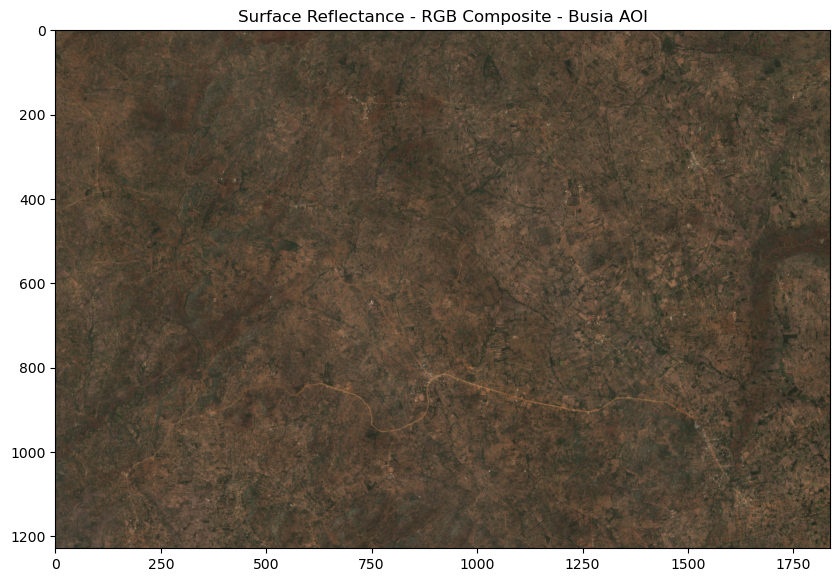

In [11]:
# Extract the RGB bands
red_band = S2_viz['B04'].isel(t=0).values
green_band = S2_viz['B03'].isel(t=0).values
blue_band = S2_viz['B02'].isel(t=0).values

# Stack the bands to create the RGB composite image
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# Normalize pixel values to the range [0, 1]
rgb_image = rgb_image / np.max(rgb_image)

# Display the RGB composite image
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
ax1.imshow(rgb_image)
ax1.set_title('Surface Reflectance - RGB Composite - Busia AOI')
plt.show()

In [12]:
# Croplands masking:
cropland_mask = connection.load_collection("ESA_WORLDCOVER_10M_2021_V2", bands=["MAP"],
                                temporal_extent = ["2000-01-01", "2022-01-01"],
                                spatial_extent={"west": 34.282, "south": 0.658, "east": 34.447, "north": 0.769}
                    )

cropland_mask = cropland_mask.band("MAP") != 40
S2_test_crop = S2_test.mask(cropland_mask.resample_cube_spatial(S2_test).max_time())

In [13]:
S2_test_crop.download("Busia_aoi_cropland_test_busia.tiff")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


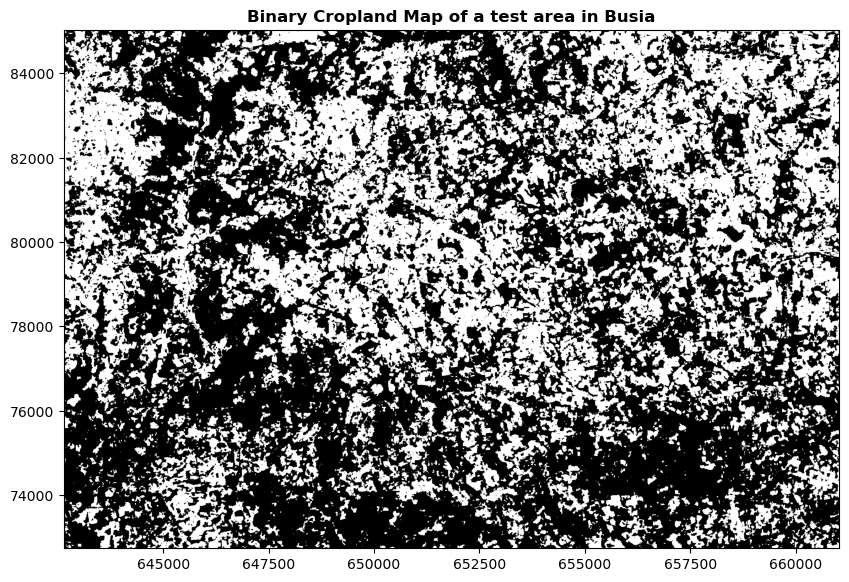

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))

with rasterio.open("Busia_aoi_cropland_test.tiff", dtype="uint8") as src:
    show(src, title="Binary Cropland Map of a test area in Busia", ax=ax)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


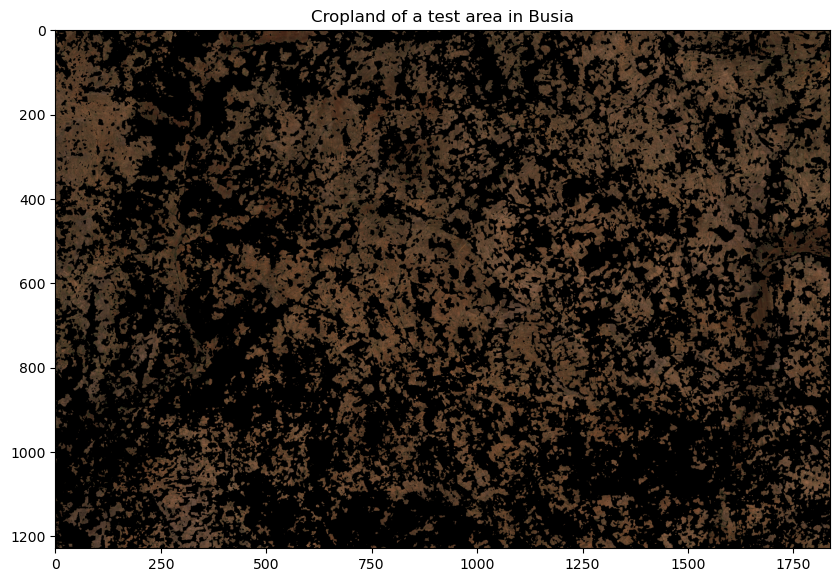

In [45]:
fig_crop = rasterio.open("Busia_aoi_cropland_test.tiff", all_touched=True)
red_band = fig_crop.read(3)
green_band = fig_crop.read(2)
blue_band = fig_crop.read(1)

# # Stack the bands to create the RGB composite image
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# Normalize pixel values to the range [0, 1]
rgb_image = rgb_image / np.max(rgb_image)

# Display the RGB composite image
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
ax1.imshow(rgb_image)
ax1.set_title('Cropland of a test area in Busia')
plt.show()

In [36]:
S2_test_2 = connection.load_collection(
  "SENTINEL2_L2A",
  spatial_extent={"west": 34.282, "south": 0.658, "east": 34.447, "north": 0.769},
  temporal_extent=["2018-05-05", "2018-05-20"],
  bands=["B02","B03","B04"]
)

In [37]:
%%time
S2_test_2.download("Busia_aoi_test_may.tiff")

CPU times: user 18.5 ms, sys: 21.4 ms, total: 40 ms
Wall time: 27.4 s


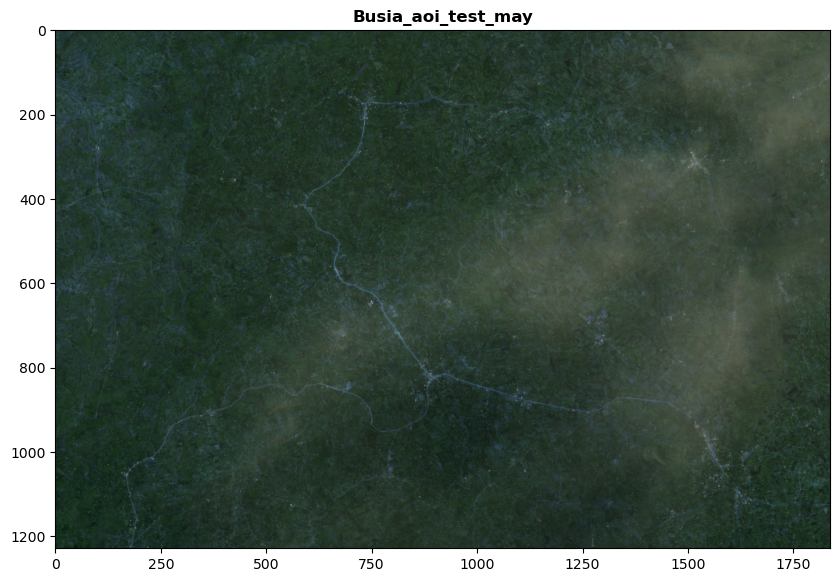

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))

with rasterio.open("Busia_aoi_test_may.tiff", dtype="float32") as src:
    data = src.read()  # Read the data
    # Rescale the data to fall within the valid range (0-1)
    data = data / data.max()
    show(data, title="Busia_aoi_test_may", ax=ax)

plt.show()

In [39]:
S2_test_cloud = connection.load_collection(
  "SENTINEL2_L2A",
  spatial_extent={"west": 34.282, "south": 0.658, "east": 34.447, "north": 0.769},
  temporal_extent=["2018-05-05", "2018-05-20"],
  bands=["SCL"]
)

In [40]:
scl_band = S2_test_cloud.band("SCL")
cloud_mask = (scl_band == 3) | (scl_band == 8) | (scl_band == 9)

cloud_mask = cloud_mask.resample_cube_spatial(S2_test_2)
cube_masked_test = S2_test_2.mask(cloud_mask)

In [41]:
%%time
cube_masked_test.download("Busia_aoi_test_may_nocloud.tiff")

CPU times: user 13.1 ms, sys: 17.8 ms, total: 30.9 ms
Wall time: 30.3 s


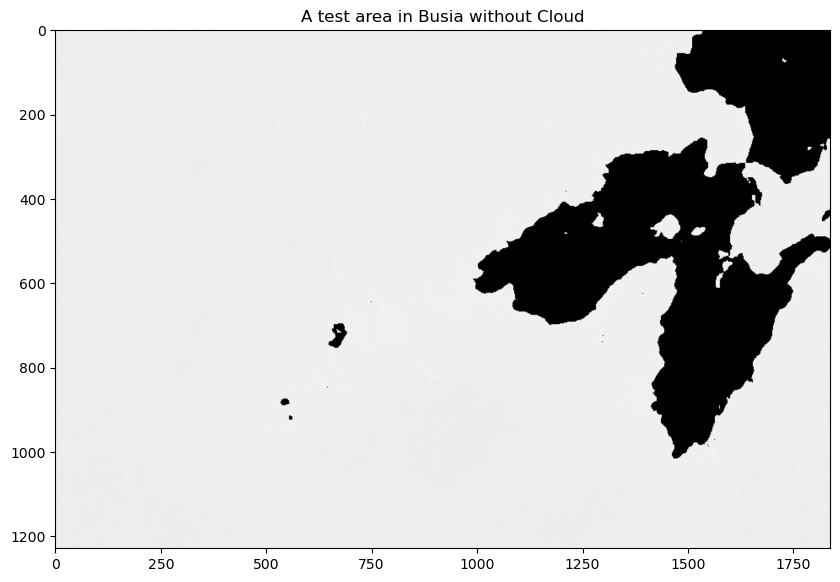

In [50]:
fig_nocloud = rasterio.open("Busia_aoi_test_may_nocloud.tiff", all_touched=True)
fig_nocloud = fig_nocloud.read(2)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
ax1.imshow(fig_nocloud, cmap="gray")
ax1.set_title('A test area in Busia without Cloud')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


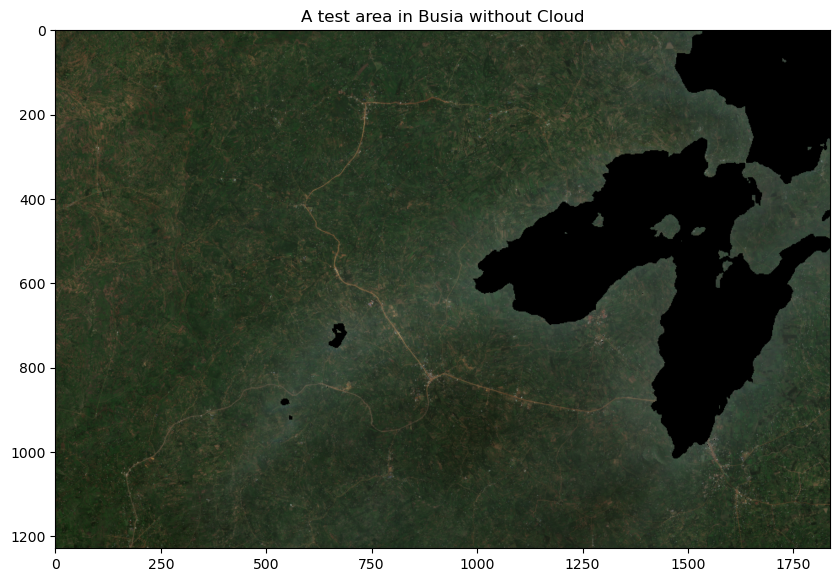

In [48]:
fig_nocloud = rasterio.open("Busia_aoi_test_may_nocloud.tiff", all_touched=True)
red_band = fig_nocloud.read(3)
green_band = fig_nocloud.read(2)
blue_band = fig_nocloud.read(1)

# # Stack the bands to create the RGB composite image
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# Normalize pixel values to the range [0, 1]
rgb_image = rgb_image / np.max(rgb_image)

# Display the RGB composite image
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
ax1.imshow(rgb_image)
ax1.set_title('A test area in Busia without Cloud')
plt.show()